# #Step 1: Data Exploration

In [1]:
import pandas as pd
data = pd.read_csv("heart_failure_clinical_records.csv")

In [2]:
# Display the first few rows of the dataset
print(data.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2       

In [3]:
# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


In [4]:
# Get statistical summary of the dataset
print(data.describe())

               age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243     0.499394                976.733979     0.496364   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                121.000000     0.000000   
50%      60.000000     0.000000                248.000000     0.000000   
75%      68.000000     1.000000                582.000000     1.000000   
max      95.000000     1.000000               7861.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        5000.000000          5000.000000    5000.000000   
mean           37.734600             0.364800  265075.404370   
std            11.514855             0.481422   97999.758622   
min            14.000000             0.000000   25100.000000   
25%          

In [5]:
# Check the distribution of the target variable
print(data['DEATH_EVENT'].value_counts())

0    3432
1    1568
Name: DEATH_EVENT, dtype: int64


In [6]:
# Visualize the distribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns

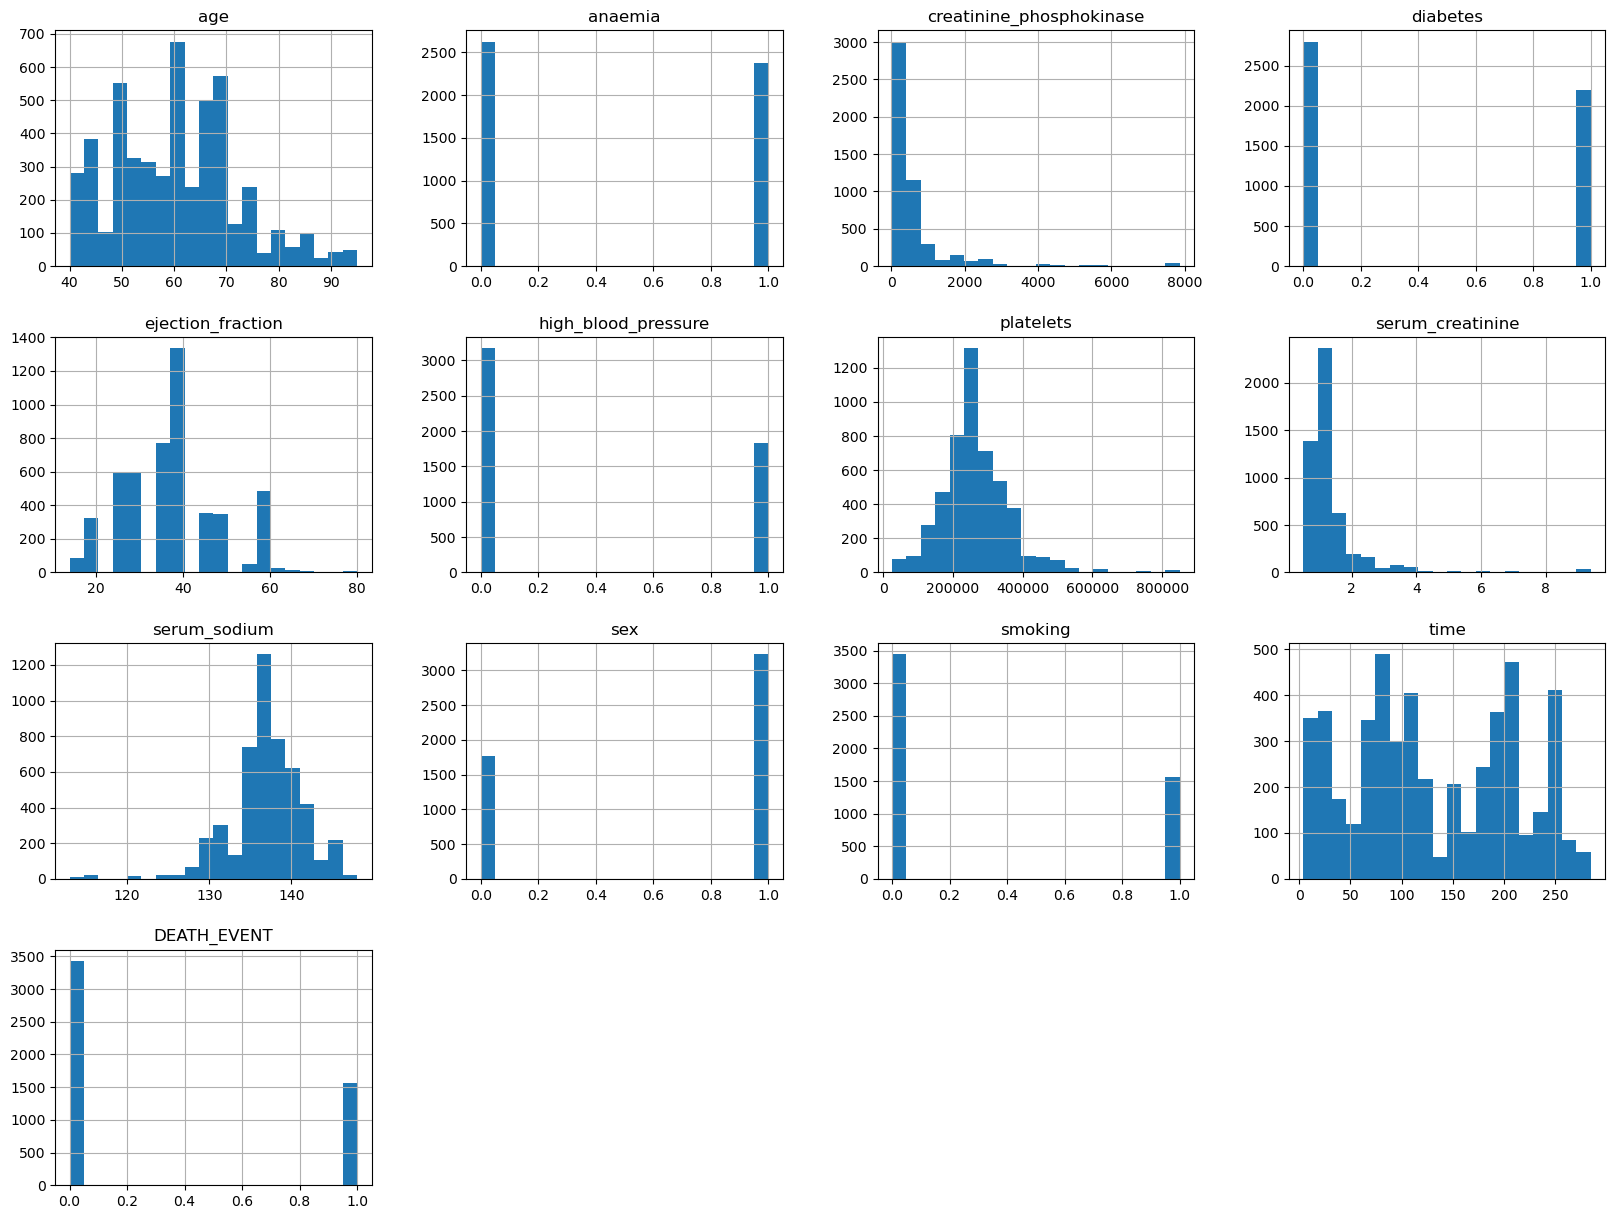

In [7]:
# Distribution of numerical features
data.hist(bins=20, figsize=(20, 15))
plt.show()

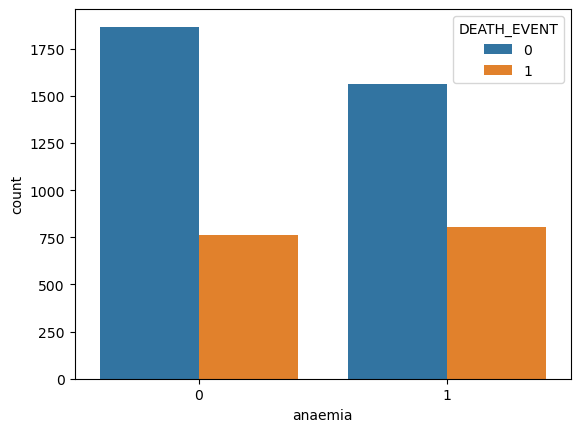

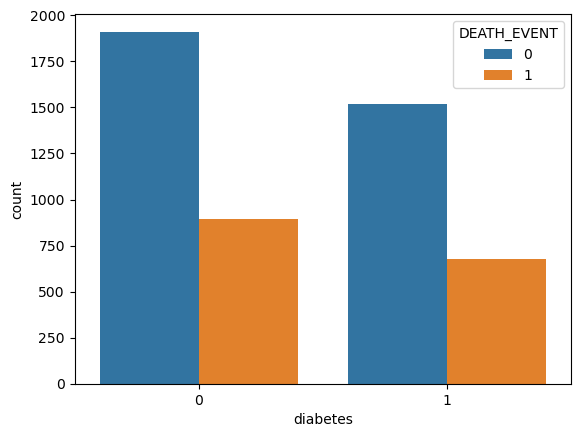

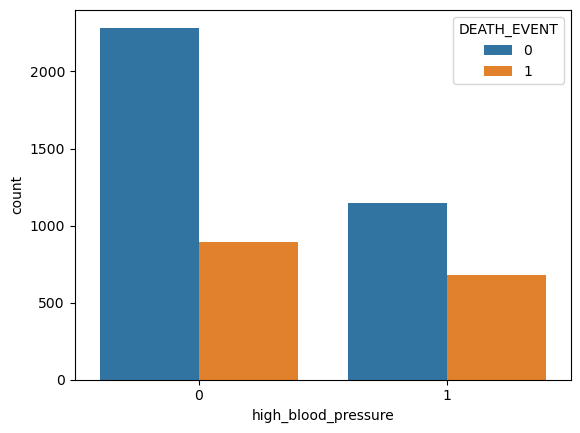

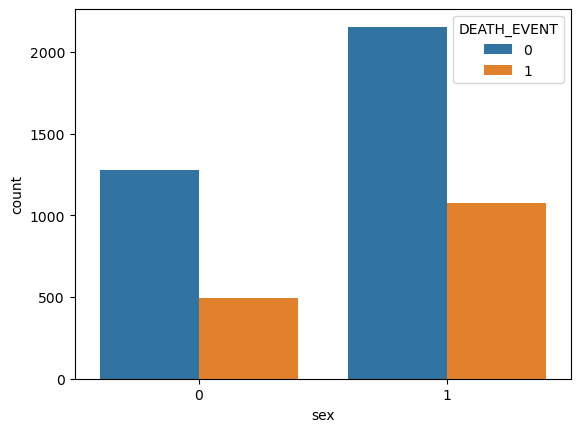

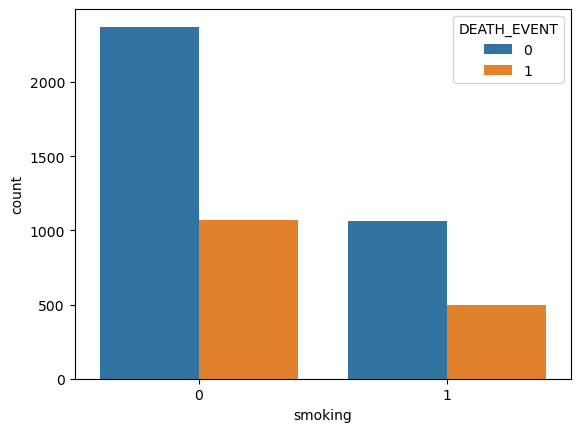

In [8]:
# Distribution of categorical features with respect to DEATH_EVENT
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for column in categorical_features:
    sns.countplot(x=column, hue='DEATH_EVENT', data=data)
    plt.show()

# #Step 2: Data Preprocessing

In [9]:
# Check for missing values
print(data.isnull().sum())


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [10]:
# Verify if categorical variables need encoding
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2       

In [11]:
# Define the features and the target variable
X = data.drop(columns='DEATH_EVENT')
y = data['DEATH_EVENT']

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (4000, 12), (4000,)
Testing set shape: (1000, 12), (1000,)


# #Step 3: Model Building

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Logistic Regression
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Train Logistic Regression model
log_reg_pipeline.fit(X_train, y_train)

# Train Decision Tree model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Step 4: Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicting the target variable using Logistic Regression
y_pred_log_reg = log_reg_pipeline.predict(X_test)

# Predicting the target variable using Decision Tree
y_pred_tree = tree_clf.predict(X_test)

In [19]:
# Logistic Regression Evaluation
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1 Score: {log_reg_f1:.4f}")
print("Confusion Matrix:")
print(log_reg_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Model Performance:
Accuracy: 0.8510
Precision: 0.7629
Recall: 0.7351
F1 Score: 0.7487
Confusion Matrix:
[[629  69]
 [ 80 222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       698
           1       0.76      0.74      0.75       302

    accuracy                           0.85      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.85      0.85      0.85      1000



In [20]:
# Decision Tree Evaluation
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)

print("\nDecision Tree Model Performance:")
print(f"Accuracy: {tree_accuracy:.4f}")
print(f"Precision: {tree_precision:.4f}")
print(f"Recall: {tree_recall:.4f}")
print(f"F1 Score: {tree_f1:.4f}")
print("Confusion Matrix:")
print(tree_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Model Performance:
Accuracy: 0.9870
Precision: 0.9769
Recall: 0.9801
F1 Score: 0.9785
Confusion Matrix:
[[691   7]
 [  6 296]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.98      0.98      0.98       302

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000

